<a href="https://colab.research.google.com/github/drshahizan/Python-big-data/blob/main/assignment/ass7/bdm/F4/F4_Assignment7_library_2%5BModin%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Brewery Operations and Market Analysis Dataset

This dataset presents an extensive collection of data from a craft beer brewery, spanning from January 2020 to January 2024. It encapsulates a rich blend of brewing parameters, sales data, and quality assessments, providing a holistic view of the brewing process and its market implications.

[Kaggle Link](https://www.kaggle.com/datasets/ankurnapa/brewery-operations-and-market-analysis-dataset)

Project Team:

LEE SEOW MING THERESA (MCS231013)\
LYE KAH HOOI (MCS231010)\
THONG YEE MOON (MCS231001)\
SITI NORAFIZAH BINTI AB AZIZ (MCS231018)




In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# Upload the kaggle Token
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (5).json


{'kaggle (5).json': b'{"username":"lyekahhooi","key":"0770886ac07f72a3595a1bd69071587d"}'}

#Import Dataset

In [3]:
! pip install kaggle --quiet
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                    title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
thedrcat/daigt-v2-train-dataset                        DAIGT V2 Train Dataset                          29MB  2023-11-16 01:38:36           2623        232  1.0              
muhammadbinimran/housing-price-prediction-data         Housing Price Prediction Data                  763KB  2023-11-21 17:56:32          11758        200  1.0              
thedevastator/netflix-imdb-scores                      Netflix IMDB Scores                            699KB  2023-12-03 14:10:34           5105         91  1.0              
manjitbaishya001/house-prices-2023                     Pakistan House 

In [4]:
!kaggle datasets download -d ankurnapa/brewery-operations-and-market-analysis-dataset

brewery-operations-and-market-analysis-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
!unzip -u "/content/brewery-operations-and-market-analysis-dataset.zip"

Archive:  /content/brewery-operations-and-market-analysis-dataset.zip


# Modin Installation

Modin is a Python library designed to enhance the performance of data manipulation and analysis tasks by providing a parallelized and distributed backend for Pandas. It introduces parallel computing capabilities, enabling the execution of Pandas operations on multiple CPU cores for faster processing times. Additionally, Modin supports distributed computing through backends like Ray or Dask, making it suitable for handling large datasets that may exceed the memory capacity of a single machine. Despite its advanced features, Modin maintains compatibility with the Pandas API, allowing users to seamlessly switch between Pandas and Modin with minimal code changes.

As a drop-in replacement for Pandas, Modin is easy to integrate into existing codebases and offers performance improvements for common operations such as filtering, grouping, and aggregating. Users can choose from multiple backends based on their specific use case and computing environment, making Modin a versatile tool for data analysis tasks. It's worth noting that the effectiveness of Modin depends on the nature of the data and the operations performed, and users are encouraged to benchmark it against Pandas to evaluate performance gains in their specific applications.


By using Modin, you can potentially speed up operations like data loading, filtering, and aggregation, especially when working with large datasets.

In [6]:
!pip install modin
!pip install modin[ray]

In [7]:
import time
import modin.pandas as pd  # Import Modin's pandas replacement
import timeit

# Function for Comparison

##Read file

In [8]:
# Read file
%%time
df = pd.read_csv('/content/brewery_data_complete_extended.csv')

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()

2023-12-26 06:37:30,039	INFO worker.py:1724 -- Started a local Ray instance.


CPU times: user 4.88 s, sys: 2.88 s, total: 7.76 s
Wall time: 1min 16s


In [9]:
%%time
df

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.77 µs


,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204251,5.289845,1.039504,5.370842,20,5,1:0.32:0.16,4666,2664.759345,8.577016,89.195882,4.104988,3.235485,4.663204
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086763,5.275643,1.059819,5.096053,36,14,1:0.39:0.24,832,9758.801062,7.420541,72.480915,2.676528,4.246129,2.044358
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539333,4.778016,1.037476,4.824737,30,10,1:0.35:0.16,2115,11721.087016,8.451365,86.322144,3.299894,3.109440,3.033880
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.418489,5.345261,1.052431,5.509243,48,18,1:0.35:0.15,3173,12050.177463,9.671859,83.094940,2.136055,4.634254,1.489889
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144908,4.861854,1.054296,5.133625,57,13,1:0.46:0.11,4449,5515.077465,7.895334,88.625833,4.491724,2.183389,2.990630
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9999995,4575645,2023-12-31 23:58:59,Stout,Bottles,Yelahanka,12,20.719151,4.944343,1.049876,5.437139,28,15,1:0.31:0.17,3054,6655.673836,6.264104,79.654815,4.612468,1.484389,1.118612
9999996,2074362,2023-12-31 23:59:18,Wheat Beer,Bottles,Electronic City,19,16.970908,5.121963,1.037019,5.102428,47,6,1:0.30:0.19,1985,10440.357817,9.651172,89.119201,2.112756,1.150946,4.972988
9999997,177617,2023-12-31 23:59:41,IPA,Bottles,Malleswaram,10,24.386184,4.747588,1.047490,5.025251,24,6,1:0.43:0.14,1982,17069.572855,9.060614,72.555455,3.393856,3.011241,2.115054
9999998,7306891,2023-12-31 23:59:45,Ale,Kegs,Electronic City,18,18.056172,5.007909,1.046138,5.843181,58,17,1:0.41:0.25,4016,5316.412808,6.297562,87.650899,4.095874,4.711502,1.535620


## Data Understanding

In [10]:
# Display first 5 rows of the DataFrame
%%time
df.head(5)

CPU times: user 927 µs, sys: 409 µs, total: 1.34 ms
Wall time: 2.76 ms


,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
0,7870796,2020-01-01 00:00:19,Wheat Beer,Kegs,Whitefield,16,24.204251,5.289845,1.039504,5.370842,20,5,1:0.32:0.16,4666,2664.759345,8.577016,89.195882,4.104988,3.235485,4.663204
1,9810411,2020-01-01 00:00:31,Sour,Kegs,Whitefield,13,18.086763,5.275643,1.059819,5.096053,36,14,1:0.39:0.24,832,9758.801062,7.420541,72.480915,2.676528,4.246129,2.044358
2,2623342,2020-01-01 00:00:40,Wheat Beer,Kegs,Malleswaram,12,15.539333,4.778016,1.037476,4.824737,30,10,1:0.35:0.16,2115,11721.087016,8.451365,86.322144,3.299894,3.109440,3.033880
3,8114651,2020-01-01 00:01:37,Ale,Kegs,Rajajinagar,17,16.418489,5.345261,1.052431,5.509243,48,18,1:0.35:0.15,3173,12050.177463,9.671859,83.094940,2.136055,4.634254,1.489889
4,4579587,2020-01-01 00:01:43,Stout,Cans,Marathahalli,18,19.144908,4.861854,1.054296,5.133625,57,13,1:0.46:0.11,4449,5515.077465,7.895334,88.625833,4.491724,2.183389,2.990630


In [11]:
# Display information of the DataFrame
%%time
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
RangeIndex: 10000000 entries, 0 to 9999999
Data columns (total 20 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Batch_ID                      int64  
 1   Brew_Date                     object 
 2   Beer_Style                    object 
 3   SKU                           object 
 4   Location                      object 
 5   Fermentation_Time             int64  
 6   Temperature                   float64
 7   pH_Level                      float64
 8   Gravity                       float64
 9   Alcohol_Content               float64
 10  Bitterness                    int64  
 11  Color                         int64  
 12  Ingredient_Ratio              object 
 13  Volume_Produced               int64  
 14  Total_Sales                   float64
 15  Quality_Score                 float64
 16  Brewhouse_Efficiency          float64
 17  Loss_During_Brewing           float64
 18  Loss_During_Ferm

In [12]:
# Display descriptive statistics of the DataFrame
%%time
df.describe()

CPU times: user 36 ms, sys: 1.97 ms, total: 38 ms
Wall time: 51.3 ms


,Batch_ID,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
count,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07,1.000000e+07
mean,5.000000e+06,1.450090e+01,1.999990e+01,4.999941e+00,1.055003e+00,5.249709e+00,3.949620e+01,1.199935e+01,2.749031e+03,1.049779e+04,7.999825e+00,8.000092e+01,3.000081e+00,3.000002e+00,3.000159e+00
std,2.886751e+06,2.872006e+00,2.887030e+00,2.886376e-01,1.443465e-02,4.329614e-01,1.154557e+01,4.321170e+00,1.299078e+03,5.485996e+03,1.154679e+00,5.774930e+00,1.154748e+00,1.154827e+00,1.154719e+00
min,0.000000e+00,1.000000e+01,1.500000e+01,4.500000e+00,1.030000e+00,4.500000e+00,2.000000e+01,5.000000e+00,5.000000e+02,1.000001e+03,6.000001e+00,7.000001e+01,1.000000e+00,1.000001e+00,1.000000e+00
25%,2.500000e+06,1.200000e+01,1.749984e+01,4.750040e+00,1.042502e+00,4.874663e+00,2.900000e+01,8.000000e+00,1.623000e+03,5.747244e+03,6.999507e+00,7.499786e+01,2.000431e+00,1.999306e+00,2.000486e+00
50%,5.000000e+06,1.500000e+01,1.999977e+01,4.999885e+00,1.055004e+00,5.249849e+00,3.900000e+01,1.200000e+01,2.749000e+03,1.049629e+04,7.999932e+00,8.000250e+01,2.999722e+00,2.999761e+00,3.000721e+00
75%,7.499999e+06,1.700000e+01,2.250076e+01,5.249937e+00,1.067505e+00,5.624602e+00,4.900000e+01,1.600000e+01,3.874000e+03,1.524921e+04,8.999796e+00,8.500283e+01,4.000636e+00,4.000587e+00,4.000120e+00
max,9.999999e+06,1.900000e+01,2.500000e+01,5.500000e+00,1.080000e+00,6.000000e+00,5.900000e+01,1.900000e+01,4.999000e+03,2.000000e+04,9.999999e+00,9.000000e+01,5.000000e+00,5.000000e+00,5.000000e+00


## Count

In [13]:
# Count number of rows in the DataFrame
%%time
len(df)

CPU times: user 61 µs, sys: 0 ns, total: 61 µs
Wall time: 65.6 µs


10000000

In [14]:
# Count the non-null values in in a variable
%%time
df['Fermentation_Time'].count()

CPU times: user 55.6 ms, sys: 7.81 ms, total: 63.4 ms
Wall time: 4.53 s


10000000

## Mean

In [15]:
# Calculate mean of a int64 variable
%%time
df.Fermentation_Time.mean()

CPU times: user 46.5 ms, sys: 16.3 ms, total: 62.7 ms
Wall time: 3.76 s


14.500898

In [16]:
# Calculate mean of a float64 variable
%%time
df.Temperature.mean()

CPU times: user 42.4 ms, sys: 2.92 ms, total: 45.3 ms
Wall time: 2.12 s


19.99989851101893

## Standard Deviation

In [17]:
# Calculate standard deviation of a int64 variable
%%time
df.Fermentation_Time.std()

CPU times: user 41 ms, sys: 7.98 ms, total: 48.9 ms
Wall time: 2.27 s


2.872006096518234

In [18]:
#Calculate standard deviation of a int64 variable
%%time
df.Temperature.std()

CPU times: user 34.2 ms, sys: 8.69 ms, total: 42.9 ms
Wall time: 2.34 s


2.8870297120328483

## Sum columns

In [19]:
# Sum of two columns
%%time
df['Fermentation_Time'] + df['Temperature']

CPU times: user 21 ms, sys: 0 ns, total: 21 ms
Wall time: 26.3 ms


0          40.204251
1          31.086763
2          27.539333
3          33.418489
4          37.144908
             ...    
9999995    32.719151
9999996    35.970908
9999997    34.386184
9999998    36.056172
9999999    33.195310
Length: 10000000, dtype: float64

## Sum columns mean

In [20]:
# Sum of two columns, then calcualte the mean of the new column
%%time
(df['Fermentation_Time'] + df['Temperature']).mean()

CPU times: user 82.7 ms, sys: 16.4 ms, total: 99.1 ms
Wall time: 5.35 s


34.50079651101894

## Value Counts

In [21]:
# Counts of unique values in the 'Fermentation_Time' column
%%time
df.Fermentation_Time.value_counts()

the groupby keys will be sorted anyway, although the 'sort=False' was passed. See the following issue for more details: https://github.com/modin-project/modin/issues/3571.


CPU times: user 55.7 ms, sys: 14.2 ms, total: 70 ms
Wall time: 2.67 s


Fermentation_Time
13    1002039
17    1001838
18    1001023
11    1000379
15     999727
19     999499
12     999128
14     999084
16     998786
10     998497
Name: count, dtype: int64

## Group-by

In [22]:
# Group by "Beer Style" and calculate mean and std for "Fermentation_Time" & "Temperature"
%%time
df_group = df.groupby(by='Beer_Style').agg({'Fermentation_Time':['mean','std'],'Temperature':['mean','std']})
df_group

(raylet) Spilled 2429 MiB, 16 objects, write throughput 78 MiB/s. Set RAY_verbose_spill_logs=0 to disable this message.


CPU times: user 714 ms, sys: 89.1 ms, total: 803 ms
Wall time: 50.5 s


Fermentation_Time           Temperature          
                        mean       std        mean       std
Beer_Style                                                  
Ale                14.501019  2.869975   19.999627  2.885095
IPA                14.499067  2.870862   19.996046  2.887033
Lager              14.501280  2.872129   20.001902  2.885562
Pilsner            14.501048  2.872510   19.997734  2.887995
Porter             14.497252  2.874011   19.999347  2.886070
Sour               14.500461  2.871251   20.003314  2.890151
Stout              14.503157  2.872608   19.998394  2.888082
Wheat Beer         14.503903  2.872704   20.002825  2.886248

In [23]:
# Group by "Beer_Style" and calculate mean for "Temperature"
%%time
df_temp = df.groupby('Beer_Style')['Temperature'].mean()
df_temp

CPU times: user 86 ms, sys: 15.3 ms, total: 101 ms
Wall time: 6.53 s


Beer_Style
Ale           19.999627
IPA           19.996046
Lager         20.001902
Pilsner       19.997734
Porter        19.999347
Sour          20.003314
Stout         19.998394
Wheat Beer    20.002825
Name: Temperature, dtype: float64

In [24]:
# Group by "Beer_Style" and calculate count
%%time
df_count = df.groupby('Beer_Style').count()
df_count

CPU times: user 13.5 ms, sys: 425 µs, total: 13.9 ms
Wall time: 33.5 ms


,Batch_ID,Brew_Date,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,Bitterness,Color,Ingredient_Ratio,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging
Beer_Style,,,,,,,,,,,,,,,,,,,
Ale,1251002,1251002,1251002,1251002,1251002,1251002,1251002,1251002,1251002,1251002,1251002,1251002,1251002,1251002,1251002,1251002,1251002,1251002,1251002
IPA,1249603,1249603,1249603,1249603,1249603,1249603,1249603,1249603,1249603,1249603,1249603,1249603,1249603,1249603,1249603,1249603,1249603,1249603,1249603
Lager,1249570,1249570,1249570,1249570,1249570,1249570,1249570,1249570,1249570,1249570,1249570,1249570,1249570,1249570,1249570,1249570,1249570,1249570,1249570
Pilsner,1249426,1249426,1249426,1249426,1249426,1249426,1249426,1249426,1249426,1249426,1249426,1249426,1249426,1249426,1249426,1249426,1249426,1249426,1249426
Porter,1250773,1250773,1250773,1250773,1250773,1250773,1250773,1250773,1250773,1250773,1250773,1250773,1250773,1250773,1250773,1250773,1250773,1250773,1250773
Sour,1250307,1250307,1250307,1250307,1250307,1250307,1250307,1250307,1250307,1250307,1250307,1250307,1250307,1250307,1250307,1250307,1250307,1250307,1250307
Stout,1250296,1250296,1250296,1250296,1250296,1250296,1250296,1250296,1250296,1250296,1250296,1250296,1250296,1250296,1250296,1250296,1250296,1250296,1250296
Wheat Beer,1249023,1249023,1249023,1249023,1249023,1249023,1249023,1249023,1249023,1249023,1249023,1249023,1249023,1249023,1249023,1249023,1249023,1249023,1249023


## Join

In [25]:
# Modin default join type is inner join
%%time
df_joined = df.join(df_group, on='Beer_Style')

CPU times: user 12 ms, sys: 325 µs, total: 12.3 ms
Wall time: 27.8 ms


##EDA Visualization

In [26]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

###Barplot

In [27]:
%%time

Beer_count = df.Beer_Style.value_counts()
Beer_count

CPU times: user 65 ms, sys: 14.7 ms, total: 79.7 ms
Wall time: 4.35 s


Beer_Style
Ale           1251002
Porter        1250773
Sour          1250307
Stout         1250296
IPA           1249603
Lager         1249570
Pilsner       1249426
Wheat Beer    1249023
Name: count, dtype: int64

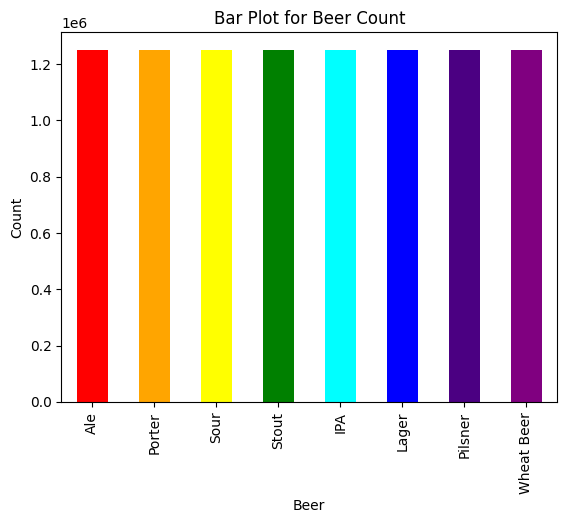

CPU times: user 227 ms, sys: 106 ms, total: 333 ms
Wall time: 281 ms


In [28]:
# Show boxplot, only use this part for execution time calculation

%%time
Beer_count.plot(kind='bar', x='Beer', y='count', color=['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'indigo','purple'])
plt.xlabel('Beer')
plt.ylabel('Count')
plt.title('Bar Plot for Beer Count')
plt.show()

### Boxplot

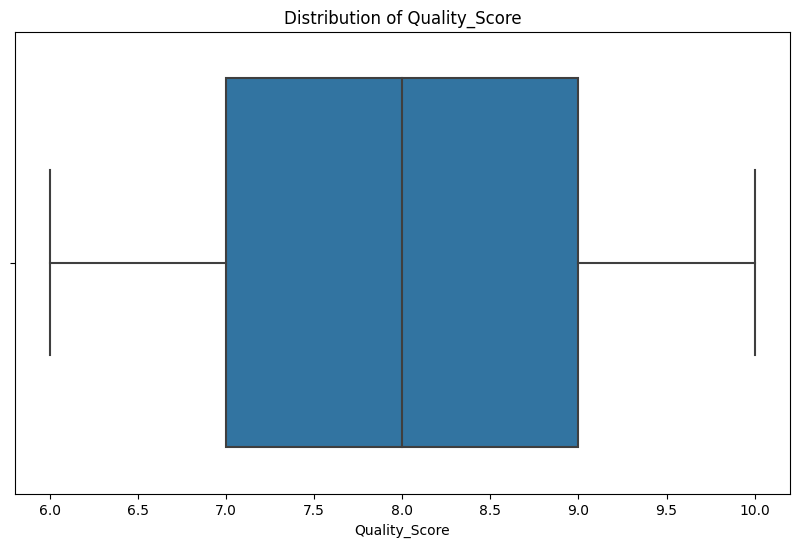

CPU times: user 716 ms, sys: 289 ms, total: 1 s
Wall time: 3.4 s


In [29]:
# Distribution of Quality_Score
%%time

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Quality_Score'])
plt.title('Distribution of Quality_Score')
plt.xlabel('Quality_Score')
plt.show()

### Scatterplot

In [30]:
%%time
df.Quality_Score.mean()

CPU times: user 67.3 ms, sys: 16.5 ms, total: 83.8 ms
Wall time: 6.75 s


7.999825148192557

In [31]:
%%time
# Reduce the size of data by applying Selection Quality Score Above mean score > 8
selected_df = df[df["Quality_Score"] > 8]
x = selected_df["Bitterness"]
y = selected_df["Color"]

CPU times: user 17.8 ms, sys: 225 µs, total: 18.1 ms
Wall time: 44.4 ms


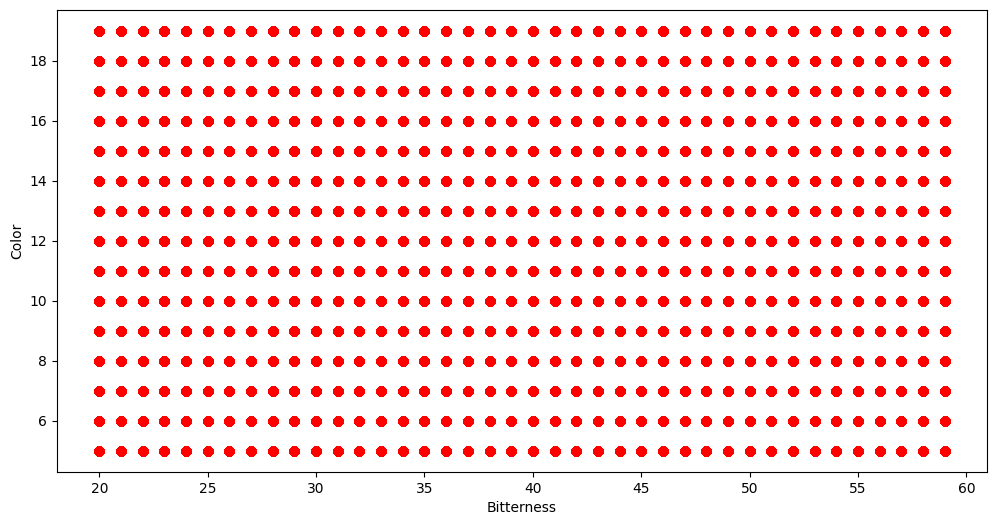

CPU times: user 14.6 s, sys: 417 ms, total: 15 s
Wall time: 42.2 s


In [32]:
%%time
# Show Scatterplot, only use this part for execution time calculation
plt.figure(figsize=(12,6))
plt.scatter(x, y, c="red", alpha=0.5)
plt.xlabel('Bitterness')
plt.ylabel('Color')
plt.show()

###Line Plot

In [33]:
%%time

df['Brew_Date'] = pd.to_datetime(df['Brew_Date'])
df['year'] = df['Brew_Date'].dt.year
df['month'] = df['Brew_Date'].dt.month
df['day'] = df['Brew_Date'].dt.day

CPU times: user 208 ms, sys: 12 ms, total: 220 ms
Wall time: 2.7 s


(raylet) Spilled 4163 MiB, 25 objects, write throughput 104 MiB/s.


In [34]:
%%time

df_filtered = df[((df.year==2023))&(df.month==1)&((df.Location=="HSR Layout"))&((df.Beer_Style=="Wheat Beer"))&((df.SKU=="Bottles"))&(df.Quality_Score>8)]
df_filtered.head(3)

CPU times: user 572 ms, sys: 64.8 ms, total: 637 ms
Wall time: 30.9 s


,Batch_ID,Brew_Date,Beer_Style,SKU,Location,Fermentation_Time,Temperature,pH_Level,Gravity,Alcohol_Content,...,Volume_Produced,Total_Sales,Quality_Score,Brewhouse_Efficiency,Loss_During_Brewing,Loss_During_Fermentation,Loss_During_Bottling_Kegging,year,month,day
7501105,4863135,2023-01-01 00:00:23,Wheat Beer,Bottles,HSR Layout,11,22.750858,5.197957,1.045337,4.528818,...,4808,13583.626459,8.401722,70.095310,3.903354,2.400495,2.556768,2023,1,1
7502031,6305750,2023-01-01 03:17:45,Wheat Beer,Bottles,HSR Layout,11,15.085842,4.776449,1.045118,5.352825,...,4841,10183.796985,9.147019,81.686958,1.448899,4.884991,4.444352,2023,1,1
7502415,164519,2023-01-01 04:33:50,Wheat Beer,Bottles,HSR Layout,14,23.711324,4.562050,1.067767,4.672952,...,2700,18407.530894,9.489385,83.120227,3.536611,1.685659,3.873033,2023,1,1


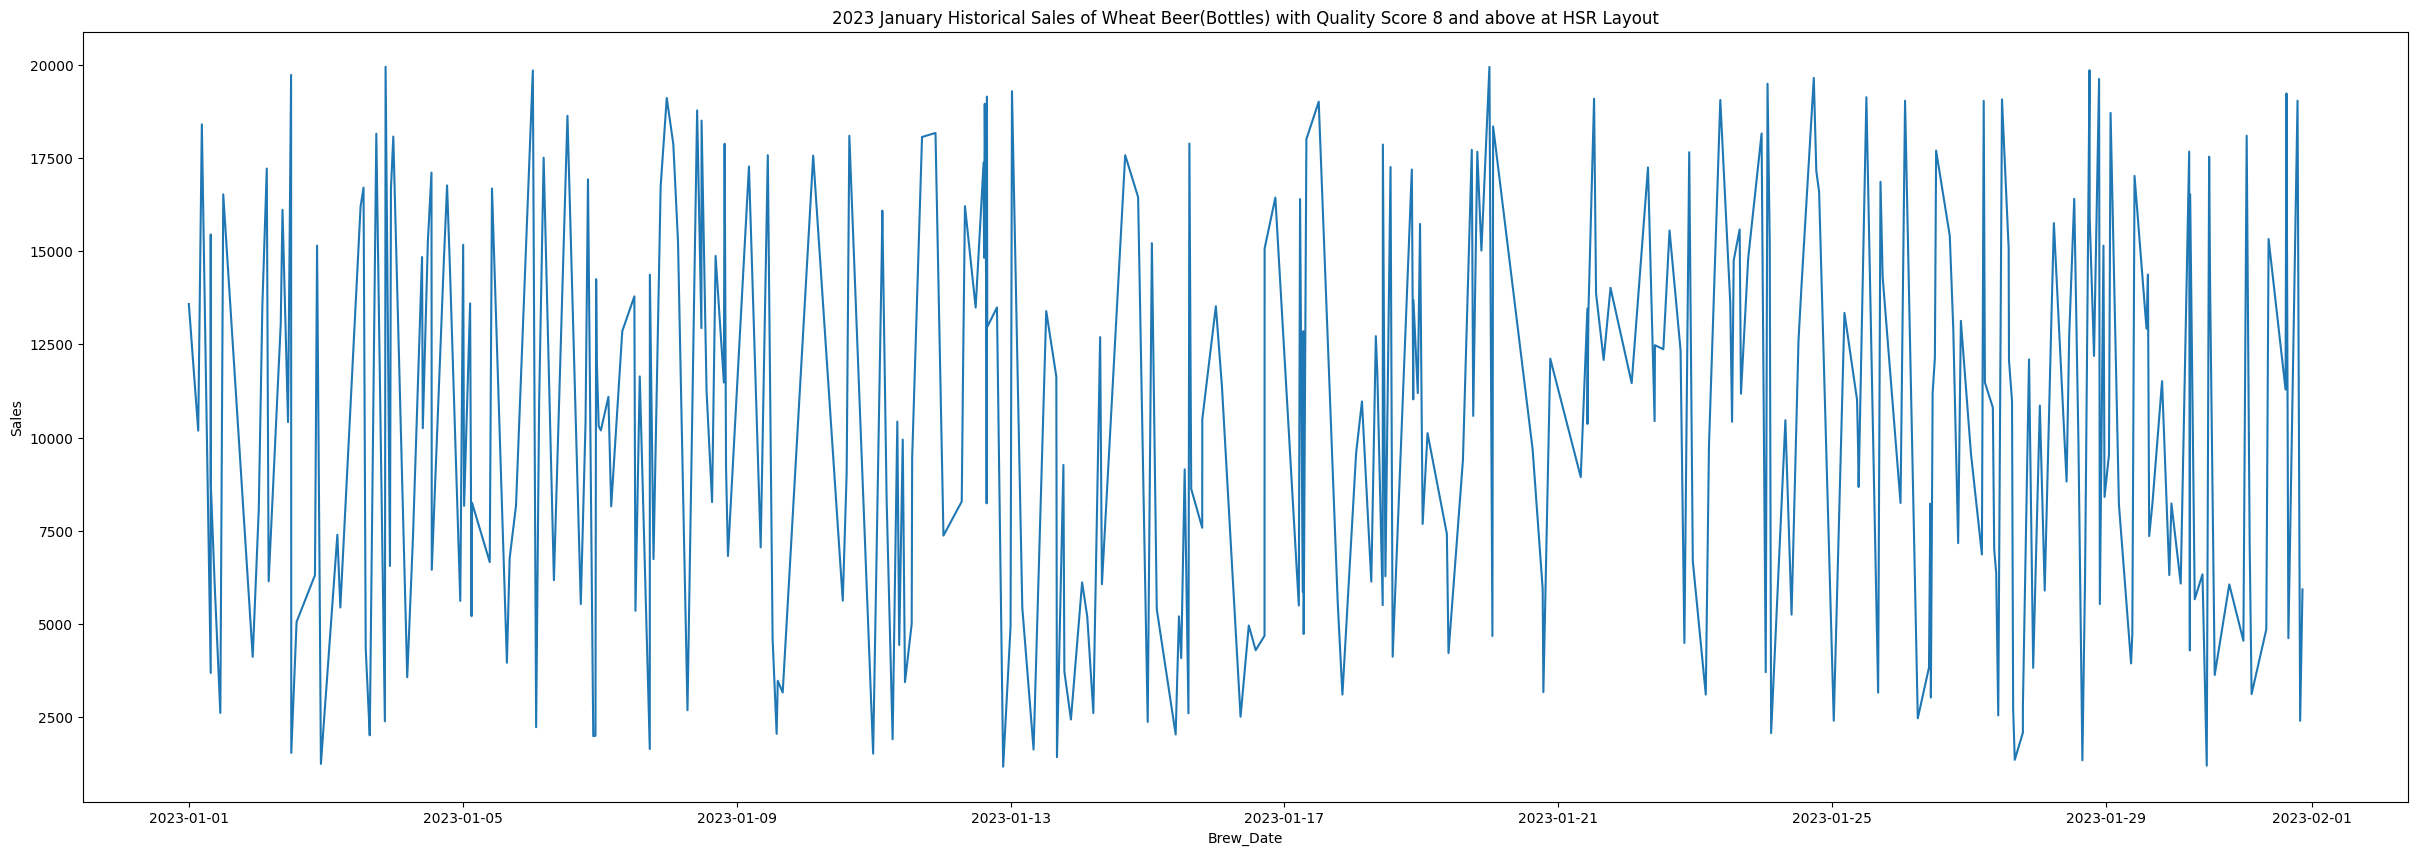

CPU times: user 431 ms, sys: 96.1 ms, total: 527 ms
Wall time: 475 ms


In [35]:
%%time

# Show lineplot, only use this part for execution time calculation
plt.figure(figsize=(30,10))
plt.plot(df_filtered.Brew_Date, df_filtered.Total_Sales)
plt.xlabel('Brew_Date')
plt.ylabel('Sales')
plt.title('2023 January Historical Sales of Wheat Beer(Bottles) with Quality Score 8 and above at HSR Layout')
plt.show()

### Histogram

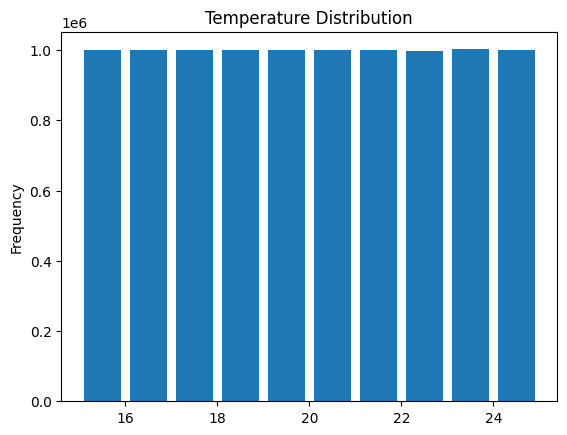

CPU times: user 1.59 s, sys: 133 ms, total: 1.72 s
Wall time: 11.8 s


In [36]:
%%time

df['Temperature'].plot.hist(bins=10, rwidth=0.8)
plt.title('Temperature Distribution')
plt.show()

###Heatmap

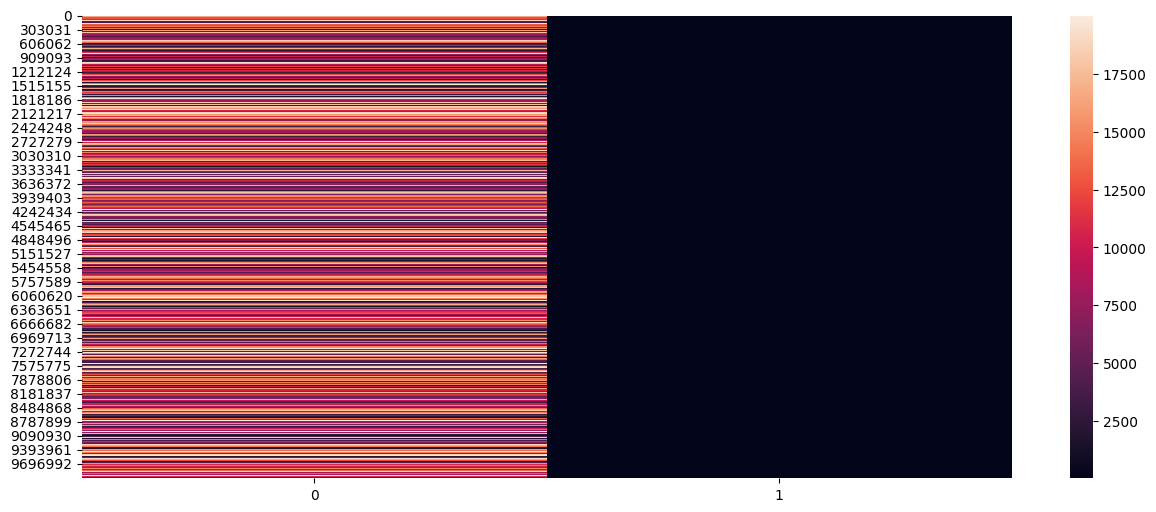

CPU times: user 20.1 s, sys: 3.2 s, total: 23.3 s
Wall time: 29.1 s


In [37]:
%%time

# Create heatmap using Seaborn
plt.figure(figsize=(15, 6))
sns.heatmap(df[['Total_Sales', 'Quality_Score']])
plt.show()

## 6 of EDA Questions

##1. What is the distribution of Alcohol Content in the dataset?

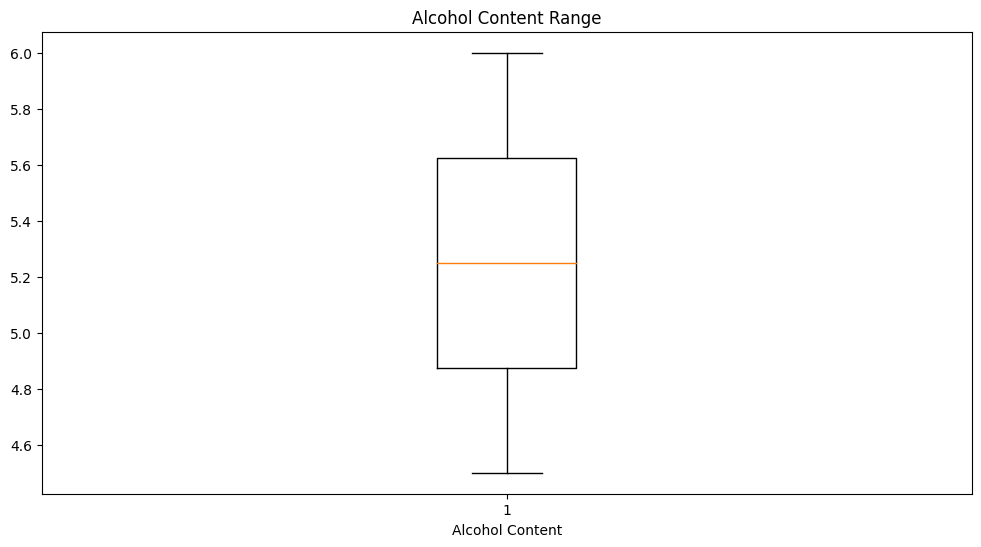

CPU times: user 674 ms, sys: 175 ms, total: 849 ms
Wall time: 6.64 s


In [38]:
%%time

plt.figure(figsize=(12,6))
plt.boxplot(x=df.Alcohol_Content)
plt.title('Alcohol Content Range')
plt.xlabel('Alcohol Content')
plt.show()

##2. Is there a relationship between pH Level and Bitterness in the brewing process?

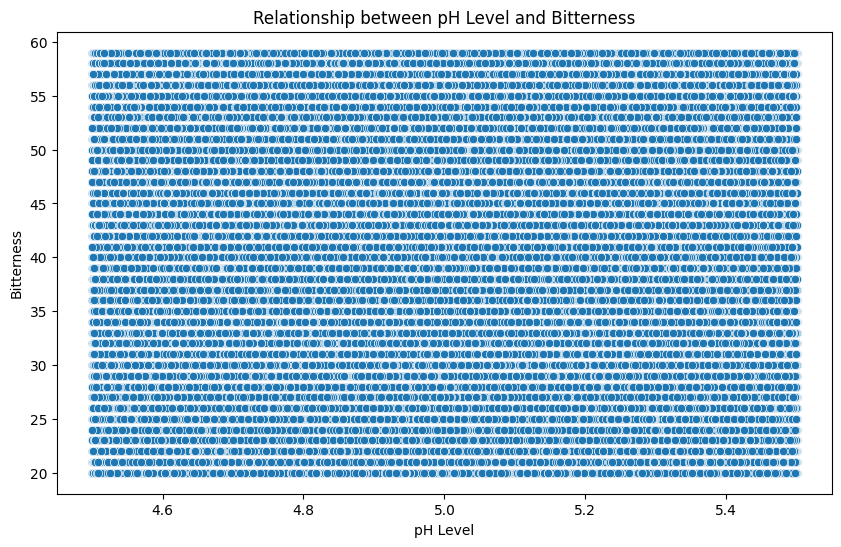

CPU times: user 21.1 s, sys: 821 ms, total: 21.9 s
Wall time: 28.3 s


In [39]:
%%time

plt.figure(figsize=(10, 6))
sns.scatterplot(x='pH_Level', y='Bitterness', data=df)
plt.title('Relationship between pH Level and Bitterness')
plt.xlabel('pH Level')
plt.ylabel('Bitterness')
plt.show()

##3. What are the top 5 Beer Styles based on Total Sales?

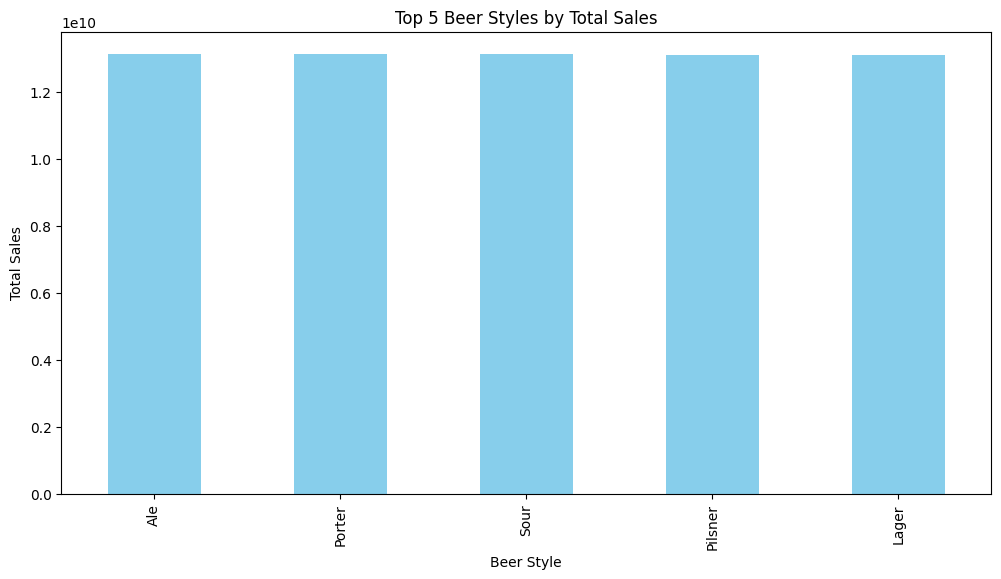

CPU times: user 406 ms, sys: 148 ms, total: 554 ms
Wall time: 10.4 s


In [40]:
%%time

top_beer_styles = df.groupby('Beer_Style')['Total_Sales'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(12, 6))
top_beer_styles.plot(kind='bar', color='skyblue')
plt.title('Top 5 Beer Styles by Total Sales')
plt.xlabel('Beer Style')
plt.ylabel('Total Sales')
plt.show()

##4. Which Location produced the most beer?

In [41]:
%%time

# Get the count of unique values in the 'Location' column
Location_count = df['Location'].value_counts().reset_index()

# Rename the columns
Location_count.columns = ['Location', 'count']

# Display the result
print(Location_count)

          Location    count
0       HSR Layout  1000789
1        Jayanagar  1000760
2      Koramangala  1000220
3     Marathahalli  1000164
4      Rajajinagar  1000147
5      Indiranagar   999887
6        Yelahanka   999818
7      Malleswaram   999629
8  Electronic City   999307
9       Whitefield   999279
CPU times: user 93.8 ms, sys: 9.57 ms, total: 103 ms
Wall time: 4.16 s


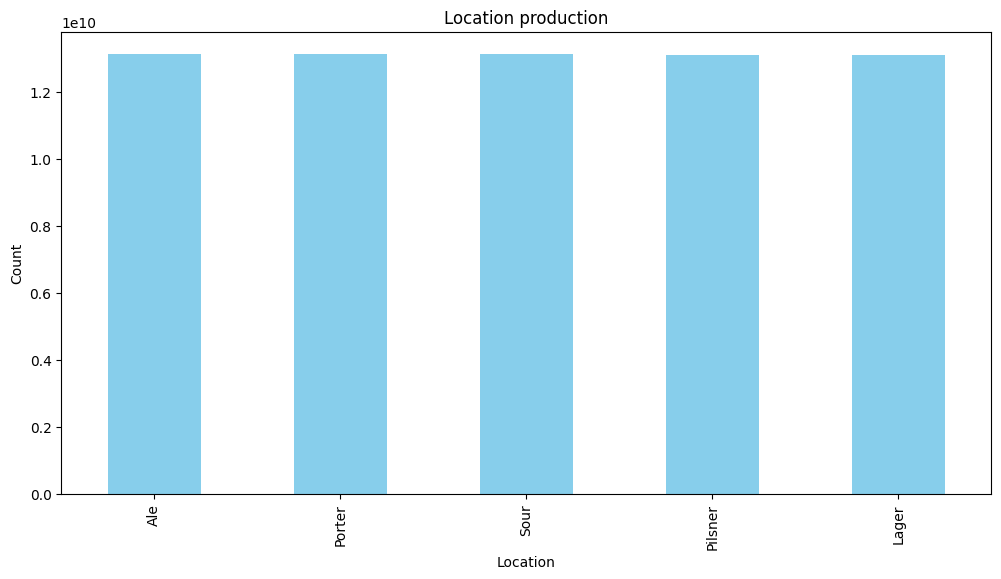

CPU times: user 224 ms, sys: 99.3 ms, total: 323 ms
Wall time: 219 ms


In [42]:
# show barplot

%%time

plt.figure(figsize=(12, 6))
top_beer_styles.plot(kind='bar', color='skyblue')
plt.title('Location production')
plt.xlabel('Location')
plt.ylabel('Count')
plt.show()

##5. What is the distribution of Fermentation Time, and are there any outliers?

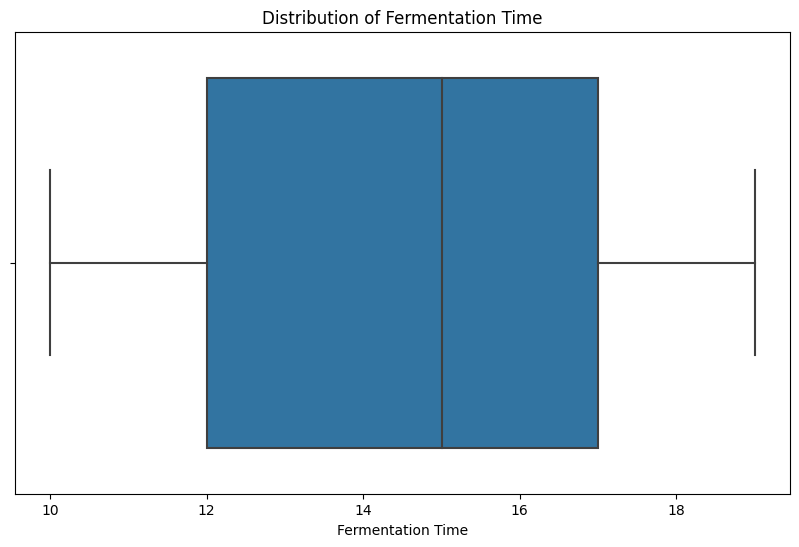

CPU times: user 746 ms, sys: 233 ms, total: 979 ms
Wall time: 4.29 s


In [43]:
%%time

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Fermentation_Time'])
plt.title('Distribution of Fermentation Time')
plt.xlabel('Fermentation Time')
plt.show()

##6. What is the Correlation between Alcohol Content and Quality Score ?

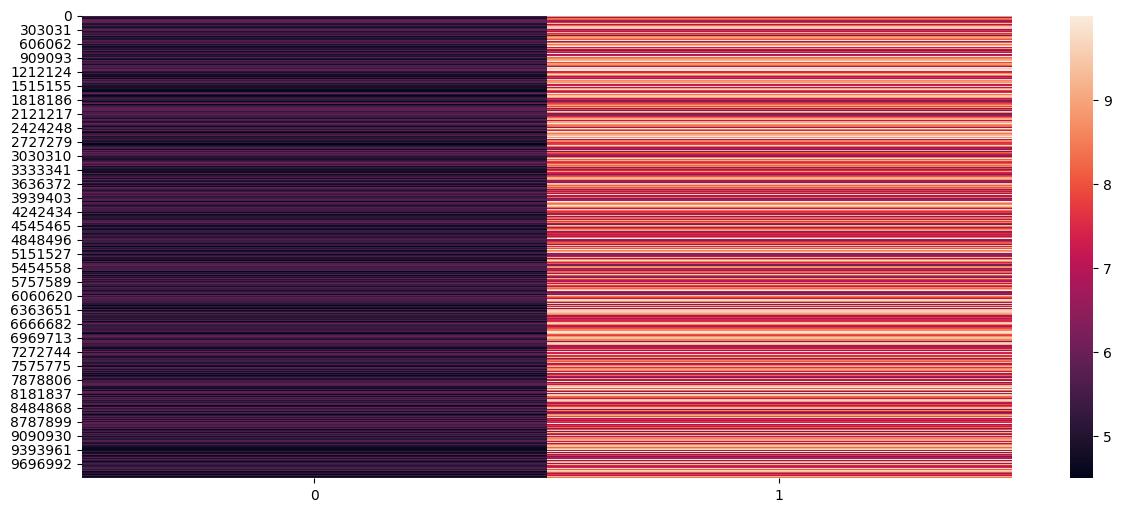

CPU times: user 19.8 s, sys: 3.27 s, total: 23.1 s
Wall time: 28.6 s


In [44]:
%%time

# Create heatmap using Pandas and Seaborn
plt.figure(figsize=(15, 6))
sns.heatmap(df[['Alcohol_Content', 'Quality_Score']])
plt.show()